# 06 - Final

## Table of contents:
1. 
2. 
3. 

## 1. Import libraries + data

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
import pylab as pl

In [39]:
import json
import folium

In [40]:
# import .json file for world countrie
country_geo = r'/Users/alliecarlisle/Desktop/CareerFoundry_Data_Analytics/Craft_Beer_Sales_Analysis/02 Data/Original Data/world_countries.json'

In [41]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [42]:
# import data path

path = r'/Users/alliecarlisle/Desktop/CareerFoundry_Data_Analytics/Craft_Beer_Sales_Analysis'

In [43]:
# import beer_clean_final.csv

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'beer_sales_updated.csv'))

In [44]:
# import beer_clean_final.pkl

df_original = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'beer_clean_final.pkl'))

In [62]:
# import clusters for merge

df_clusters = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'clusters.pkl'))

In [45]:
# display all columns
pd.options.display.max_columns = None

In [46]:
# display 50 rows
pd.options.display.max_rows = 50

In [47]:
df.shape

(43487, 24)

In [48]:
df.head()

,product_code,vendor,name,retail_price,product_unit,vendor_country,size,abv,full_date,year,month,day_of_month,day_of_week,time,units_sold,revenue,discount,profit,percent_markup,percent_discount,_merge,abv_category,month_no,weekday_no
0,1594.0,Weihenstephaner,Weihenstephaner Original Barrel,720.0,Liters,Germany,1.0,5.1,2021-08-17 00:00:00,2021.0,Aug,17.0,Tuesday,13.0,14.5,9997.26,442.74,6192.46,162.75,4.24,both,regular abv,8.0,1.0
1,2443.0,Schneider Weisse,Schneider Weisse TAP 7 Majn Orig Barrel,720.0,Liters,Germany,1.0,5.4,2021-07-13 00:00:00,2021.0,Jul,13.0,Tuesday,2.0,14.8,9995.71,660.29,5961.23,147.76,6.20,both,regular abv,7.0,1.0
2,1507.0,Weihenstephaner,Weihenstephaner Festbier / 5.8%,400.0,Liters,Germany,1.0,5.8,2021-10-12 00:00:00,2021.0,Oct,12.0,Tuesday,17.0,14.5,9982.83,457.17,6030.13,152.56,4.38,both,regular abv,10.0,1.0
3,3558.0,Almogaver,Almogaver Hop'N'Roll DIPA Barrel30,920.0,Liters,Spain,1.0,8.5,2021-09-18 00:00:00,2021.0,Sep,18.0,Saturday,0.0,12.0,9965.54,1074.46,4925.54,97.73,9.73,both,high abv,9.0,5.0
4,3594.0,XP Brew,XP Brew Tropical Treat: Passion Fruit & Coconu...,600.0,Liters,Russia,1.0,5.0,2021-05-22 00:00:00,2021.0,May,22.0,Saturday,23.0,17.5,9965.00,535.00,5590.00,127.77,5.10,both,regular abv,5.0,5.0


In [49]:
df.isnull().sum()

product_code         513
vendor              3659
name                 513
retail_price         513
product_unit         513
vendor_country      3532
size                 513
abv                  513
full_date            513
year                 513
month                513
day_of_month         513
day_of_week          513
time                 513
units_sold           513
revenue              513
discount            9261
profit               513
percent_markup       513
percent_discount    9261
_merge               513
abv_category         513
month_no             513
weekday_no           513
dtype: int64

In [50]:
df_2 = df[['abv', 'units_sold', 'revenue', 'discount', 'profit', 'percent_markup', 'weekday_no']]

In [51]:
df_2.shape

(43487, 7)

Text(0.57, 1.02, 'Alcohol by Volume and Revenue Scatter Plot')

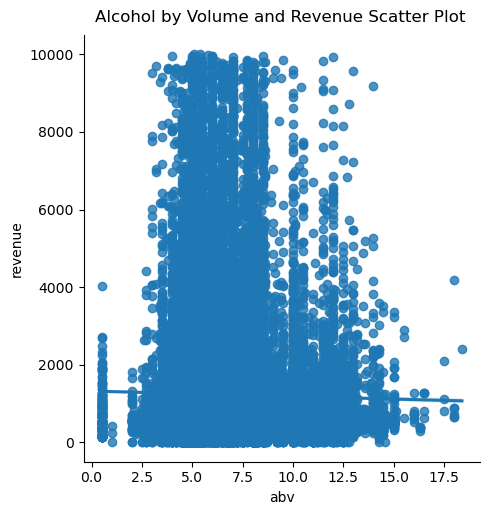

In [52]:
# scatterplot for revenue and profit

scatter = sns.lmplot(x = 'abv', y = 'revenue', data = df_2)
fig = scatter.fig
fig.suptitle("Alcohol by Volume and Revenue Scatter Plot", x=0.57, y=1.02, ha='center')

In [53]:
# save scatter

fig.savefig("units_sold_rev.png")

<Axes: xlabel='revenue', ylabel='Count'>

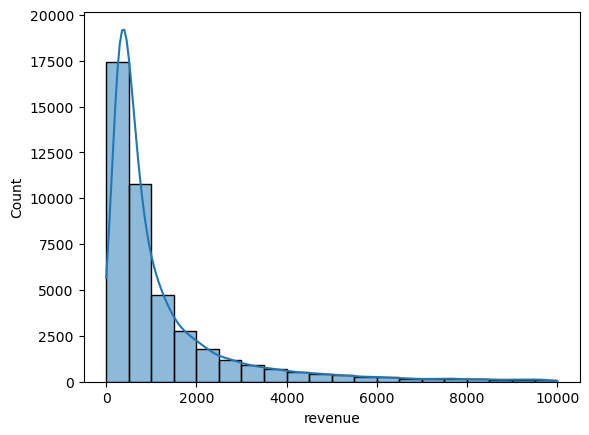

In [54]:
# check for extreme values in revenue

sns.histplot(df['revenue'], bins = 20, kde = True)

In [55]:
# check how many extreme values
df[df['revenue'] > 10000]

,product_code,vendor,name,retail_price,product_unit,vendor_country,size,abv,full_date,year,month,day_of_month,day_of_week,time,units_sold,revenue,discount,profit,percent_markup,percent_discount,_merge,abv_category,month_no,weekday_no


In [56]:
df.shape

(43487, 24)

In [57]:
# clean extreme values

df_2 = df[df['revenue'] < 10000]

In [58]:
df_2.shape

(42974, 24)

In [59]:
43487 - 42974

513

In [60]:
# create data frame with just vendor_country and profit
df_map = df_2[['vendor_country', 'revenue']]
df_map.head(5)

,vendor_country,revenue
0,Germany,9997.26
1,Germany,9995.71
2,Germany,9982.83
3,Spain,9965.54
4,Russia,9965.00


In [61]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = df_map,
    columns = ['vendor_country', 'revenue'],
    key_on = 'feature.properties.name',
    fill_color = 'Greens', fill_opacity=0.9, line_opacity=0.1,
    nan_fill_color='white',  # Color for NaN countries
    nan_fill_opacity=0.3,    # Opacity for NaN countries
    legend_name = "revenue in rubles").add_to(map)
folium.LayerControl().add_to(map)

map